<a href="https://colab.research.google.com/github/DarleyLeal/projetos_asimov_academy/blob/main/ReferenciaMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EXPLORANDO O DATASET

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [4]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)

In [5]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [6]:
dict_keys=(['data', 'target', 'frame', 'categories', 'features_names', 'target_names', 'DESCR', 'details', 'url'])


In [7]:
x, y = mnist['data'].values, mnist['target'].values
y = y.astype(np.float)

<ipython-input-7-8057d662ae05>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.float)


In [ ]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y

array([5., 0., 4., ..., 4., 5., 6.])

1.0


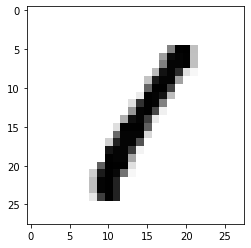

In [8]:
n = 3

plt.imshow(x[n].reshape(28,28), cmap='binary')
print(y[n])
plt.show()

*CLASSIFICADOR BINÁRIO*

In [9]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


In [10]:
y_train_5 = (y_train == 5)


In [11]:
pd.Series(y_train_5).value_counts()

False    44572
True      4428
dtype: int64

In [12]:
from sklearn.linear_model import SGDClassifier


sgd_clf = SGDClassifier()
sgd_clf.fit(x_train, y_train_5)


SGDClassifier()

Classe real:  False
Classe predita pelo modelo: [False]


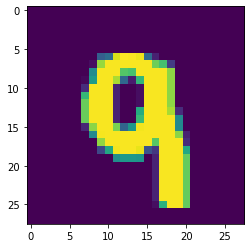

In [13]:
n = 3

plt.imshow(x_train[n].reshape(28,28))
print("Classe real: ", y_train_5[n])
print("Classe predita pelo modelo:", sgd_clf.predict([x_train[n]]))

Classe real:  False
Classe predita pelo modelo: [False]


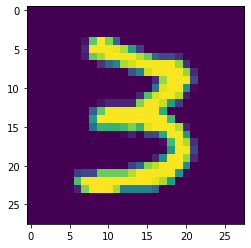

In [ ]:
n = 5

plt.imshow(x_train[n].reshape(28,28))
print("Classe real: ", y_train_5[n])
print("Classe predita pelo modelo:", sgd_clf.predict([x_train[n]]))

Classe real:  False
Classe predita pelo modelo: [False]


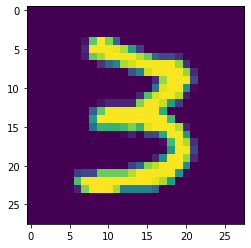

In [ ]:
n = 5

plt.imshow(x_train[n].reshape(28,28))
print("Classe real: ", y_train_5[n])
print("Classe predita pelo modelo:", sgd_clf.predict([x_train[n]]))

Classe real:  False
Classe predita pelo modelo: [False]


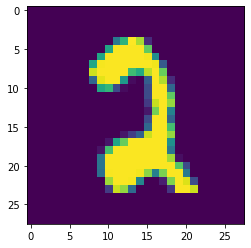

In [ ]:
n = 6

plt.imshow(x_train[n].reshape(28,28))
print("Classe real: ", y_train_5[n])
print("Classe predita pelo modelo:", sgd_clf.predict([x_train[n]]))

Classe real:  False
Classe predita pelo modelo: [False]


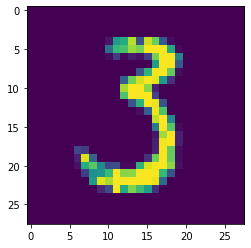

In [ ]:
n = 8

plt.imshow(x_train[n].reshape(28,28))
print("Classe real: ", y_train_5[n])
print("Classe predita pelo modelo:", sgd_clf.predict([x_train[n]]))

Classe real:  False
Classe predita pelo modelo: [False]


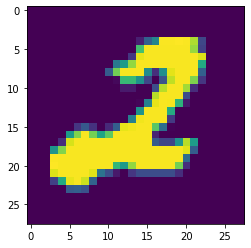

In [ ]:
n = 10

plt.imshow(x_train[n].reshape(28,28))
print("Classe real: ", y_train_5[n])
print("Classe predita pelo modelo:", sgd_clf.predict([x_train[n]]))

In [14]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring='accuracy')

array([0.9607567 , 0.95989714, 0.95775424])

MATRIZ DE CONFUSÃO 

In [ ]:
from sklearn.metrics import confusion_matrix
#Usado apenas em modelos de classificação


confusion_matrix(y_train_5, sgd_clf.predict(x_train))


In [20]:
from sklearn.metrics import precision_score, recall_score
y_train_pred = sgd_clf.predict(x_train)

print("Precision", precision_score(y_train_5, y_train_pred))
print("Recall", recall_score(y_train_5, y_train_pred))

Precision 0.8130962705984388
Recall 0.8468834688346883


In [22]:
from sklearn.metrics import classification_report



print(confusion_matrix(y_train_5, sgd_clf.predict(x_train)))
print(classification_report(y_train_5, y_train_pred))

[[43710   862]
 [  678  3750]]
              precision    recall  f1-score   support

       False       0.98      0.98      0.98     44572
        True       0.81      0.85      0.83      4428

    accuracy                           0.97     49000
   macro avg       0.90      0.91      0.91     49000
weighted avg       0.97      0.97      0.97     49000



CLASSIFICAÇÃO MULTICLASSES

In [24]:
sgd_clf.fit(x_train, y_train)

SGDClassifier()

SGDClassifier()

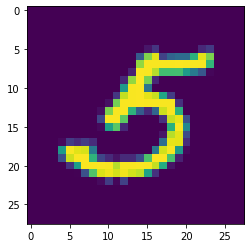

In [38]:
n = 59
digit = x_train[n]
plt.imshow(digit.reshape(28,28))

In [37]:
sgd_clf.predict([digit])

array([4.])

In [39]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train, cv=3)

In [40]:
conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mx)
print(classification_report(y_train, y_train_pred))

[[4685    1   31   12   17   26   24    5   69    6]
 [   3 5317   31   12   19   33    8    8  109    6]
 [  54   61 4180   81   65   24   72   48  269   14]
 [  39   22  229 3994   25  234   20   40  334   83]
 [  23   26   45   21 4132   13   56   20  259  142]
 [  85   20   61  124  107 3533   75   19  344   60]
 [  57   22   88    6   39  103 4390    2   93    1]
 [  23   25   86   24   61   27    7 4531   93  243]
 [  46   93  142   92   82  194   21   20 4001   75]
 [  33   29   42   38  347  117    1  149  483 3599]]
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94      4876
         1.0       0.95      0.96      0.95      5546
         2.0       0.85      0.86      0.85      4868
         3.0       0.91      0.80      0.85      5020
         4.0       0.84      0.87      0.86      4737
         5.0       0.82      0.80      0.81      4428
         6.0       0.94      0.91      0.93      4801
         7.0       0.94      0.88   

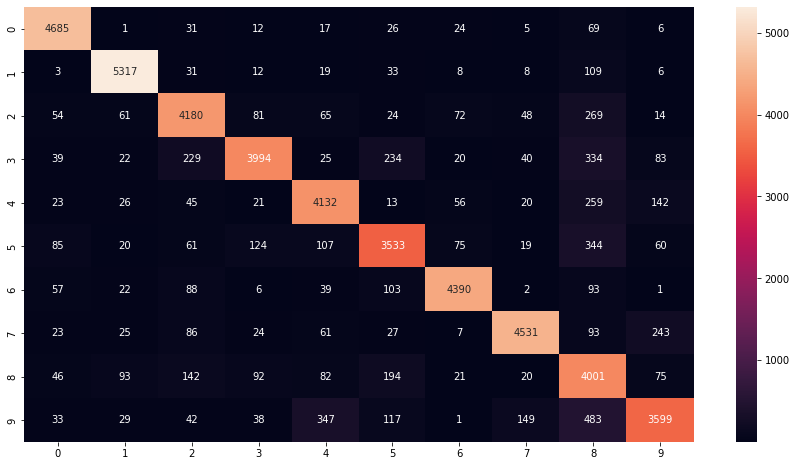

In [42]:
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(conf_mx, annot=True, fmt=".0f")

CLASSIFICAÇÃO MULTILABEL

In [43]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_multilabel)

KNeighborsClassifier()

KNeighborsClassifier()

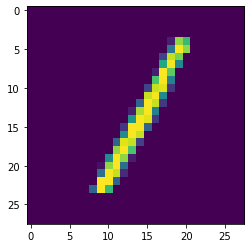

In [46]:
n = 2

digit = x_train[n]
plt.imshow(digit.reshape(28, 28))

In [47]:
knn_clf.predict([digit])

array([[False,  True]])